## Homework 2

Run the following command to load the diabetes dataset in the Scikit-learn library. Matrix $X$ is called the feature matrix. Each row of $X$ is a data example or observation and called a feature vector denoted by $x$. Each column of $X$ contains ensembles of a feature or an independent variable. This dataset contains 442 examples with 10 features per example. In the context of multiple linear regression, this corresponds to the linear system $$X w = y,$$ where $w \in \Re^M, y \in \Re^D, X \in \Re^{D\times M}$. Since lasso regression is sensitive to the feature scale, the feature matrix is normalized such that $$\sum_{i=1}^D X_{ij}^2 = 1,$$ and the output vector $y$ is centered by its mean so that the bias is zero and needs not be included in the model.

In [71]:
from tqdm import tqdm
import numpy as np
from numpy.linalg import inv, norm
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import normalize
X, y = load_diabetes(return_X_y=True)
X = normalize(X, axis=0, norm='l2')
y = y-np.mean(y)

In [72]:
# Visualize
print(X.shape); print(y.shape)

(442, 10)
(442,)


### Problem 1. 
Compute the model parameter $w$ of the standard or ordinary least squares (OLS) model

$$w_{LS} = (X^TX)^{-1}X^Ty $$

Show all elements of $w$ and the norm of data residual $||X w - y||$ which will be used as the baseline performance value to be compared with that from lasso regression.

In [73]:
wLS = inv(X.T @ X) @ X.T @ y
rLS = norm(X @ wLS - y)
print('OLS model parameters: ', wLS)
print('OLS residual: ', rLS)

OLS model parameters:  [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
OLS residual:  1124.2712242307653


### Problem 2.
Implement the coordinate descent algorithm as a function. Then use it to compute the model parameter $w$ of the lasso regression model with regularization parameters $10^{-3}, 10^{-2}, 10^{-1}, 1, 10, 100$. Use 200 epochs per each value of the regularization parameter. Note that each epoch cooresponds to 10 iterations in this case since each parameter is updated in each iteration . Show all elements of $w$ and the norm of data residual $||X w - y||$ in the last epoch for each regularization parameter. What is the smallest regularization parameter that can provide a simple model parameter and still has a small residual norm compared to that of OLS? Note that a simple model parameter in this case means that some parameters are zero.

In [75]:
# Initialize
lambdas = 10**np.linspace(-3, 3, 7)
rs = np.zeros_like(lambdas) # Residue
ws = np.zeros((rs.shape[0], wLS.shape[0])) # Weights
ws.shape
D, J = X.shape
n_epochs = 200

# Coordinate descent algorithm (200 epochs)
for idx, lamb in enumerate(lambdas):
    w = wLS.copy()
    for e in tqdm(range(n_epochs), desc=f'lambda = {lamb:.0e}'):
        for j in range(J):
            def Sum(i,j):
                return sum(X[i,k] * w[k] for k in range(J) if k != j) # for k in range(J), j excluded
            rho = sum(X[i,j] * (y[i] - Sum(i,j)) for i in range(D))
            w[j] = np.sign(rho) * max(0, np.abs(rho) - lamb)
    ws[idx] = w
    rs[idx] = norm(X @ w - y)

    print(f'lambda = {lamb:.0e} w elements: ', w)
    print(f'lambda = {lamb:.0e} residual norm: ', rs[idx])

lambda = 1e-03: 100%|████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 61.32it/s]


lambda = 1e-03 w elements:  [ -10.00759211 -239.81359463  519.84681278  324.38250297 -792.01925731
  476.61879947  100.96848435  177.03551438  751.21736267   67.6263459 ]
lambda = 1e-03 residual norm:  1124.271224420946


lambda = 1e-02: 100%|████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 76.85it/s]


lambda = 1e-02 w elements:  [  -9.98712445 -239.79515327  519.85484736  324.36322017 -790.61182614
  475.53680564  100.29543205  176.78600479  750.71033065   67.62322932]
lambda = 1e-02 residual norm:  1124.2712432488295


lambda = 1e-01: 100%|████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 72.57it/s]


lambda = 1e-01 w elements:  [  -9.78244776 -239.61073966  519.93519307  324.17039222 -776.53751438
  464.71686735   93.56490904  174.2909089   745.64001048   67.59206355]
lambda = 1e-01 residual norm:  1124.2731260355945


lambda = 1e+00: 100%|████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 75.44it/s]


lambda = 1e+00 w elements:  [  -7.73568088 -237.76660352  520.73865016  322.24211264 -635.79439686
  356.51748445   26.259679    149.33994994  694.93680882   67.28040585]
lambda = 1e+00 residual norm:  1124.4613887918886


lambda = 1e+01: 100%|████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 55.72it/s]


lambda = 1e+01 w elements:  [  -0.         -217.28185299  525.45001251  309.01064196 -166.67936904
   -0.         -174.75465559   73.18262011  525.18527277   61.45792644]
lambda = 1e+01 residual norm:  1127.4779702826445


lambda = 1e+02: 100%|████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 66.86it/s]


lambda = 1e+02 w elements:  [   0.          -54.58955613  509.80907894  222.51639194   -0.
   -0.         -154.62292777    0.          447.68161369    0.        ]
lambda = 1e+02 residual norm:  1154.927197296658


lambda = 1e+03: 100%|████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 74.95it/s]

lambda = 1e+03 w elements:  [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
lambda = 1e+03 residual norm:  1618.953095192813


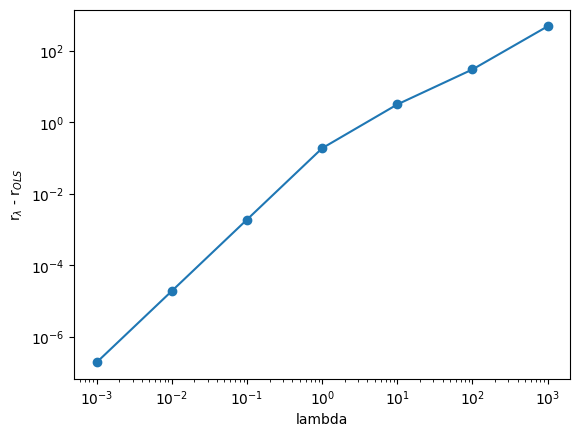

In [76]:
# Plot
import matplotlib.pyplot as plt
plt.loglog(lambdas, rs - rLS, marker='o')
plt.xlabel('lambda'); plt.ylabel('r$_\lambda$ - r$_{OLS}$')
plt.show()

**Conclusion**

The smallest regularization parameter with the simplest model that still retains similar residual norm compared to OLS is lambda = 10, with two weights equal to zero and a residual norm difference of ~3. For lambda > 10, while it is true that the models are simpler (more zeros), the residual norm starts to be significantly higher than the OLS norm, and are thus worse models.

**Submitted by Chatdanai Sawangwong 6505066**